In [1]:
from graph_tools import graph
from collections import deque
import matplotlib.pyplot as plt
import re
import timeit
from collections import deque, defaultdict

# Graph Creation

In [2]:
def movie_to_graph(path):
    # Creating graphs
    actor_graph = graph()
    # Reading the <MOVIE> <ACTOR1> .....<ACTORn>
    with open(path,'r') as file:
        for line in file:
            divided_parts = line.split(' ')
            movie = divided_parts[0] # <MOVIE>
            actors = divided_parts[1:-1] # <ACTOR1> ........ <ACTORn> of a particular movie
            for actor in actors:
                for coactor in actors:
                    if coactor!= actor:
                        actor_graph.Add_und_edge(actor, coactor, movie) #addition of edge <ACTORi> - <MOVIE> - <ACTORj>
    return actor_graph

path = './all_imdb_cleaned.txt'
f_graph = movie_to_graph(path)

# for actor in f_graph.adj_list:
#     print(f"{actor}: {f_graph.adj_list[actor]}")


# Full-BFS Implementation

In [3]:
def full_bfs(graph,start_node):
    """This function does BFS from a start_node"""
    
    # Initialising a queue
    queue = deque([start_node])
    # Predicisors
    pred = {}
    # Set of visited nodes
    visited=set()
    
    pred[start_node] = None
    visited.add(start_node)
    
    while queue:
        current_node= queue.popleft()
        for neighbour, movie in graph.adj_list.get(current_node,{}).items():
            if neighbour not in visited:
                visited.add(neighbour)
                pred[neighbour]=current_node
                queue.append(neighbour)
    return pred
full_bfs(f_graph,'Blanche_Bayliss')
    

{'Blanche_Bayliss': None,
 'William_Courtenay': 'Blanche_Bayliss',
 'Chauncey_Depew': 'Blanche_Bayliss',
 'Macey_Harlam': 'William_Courtenay',
 'Alice_Dovey': 'William_Courtenay',
 'Norman_Thorpe': 'William_Courtenay',
 'Frank_Daniels': 'William_Courtenay',
 'May_Irwin': 'William_Courtenay',
 'Charlotte_Walker': 'William_Courtenay',
 'Jane_Grey': 'William_Courtenay',
 'Alphonse_Ethier': 'William_Courtenay',
 'Lorraine_Frost': 'William_Courtenay',
 'Charles_Wells': 'William_Courtenay',
 'Richard_Turner': 'William_Courtenay',
 'Montague_Allen': 'Chauncey_Depew',
 'Joseph_Choate': 'Chauncey_Depew',
 'J.N._Greenshields': 'Chauncey_Depew',
 'John_Pratt': 'Chauncey_Depew',
 'Donald_Smith': 'Chauncey_Depew',
 'William_Howard_Taft': 'Chauncey_Depew',
 'William_Jennings_Bryan': 'Chauncey_Depew',
 'Andrew_Carnegie': 'Chauncey_Depew',
 'Phillips_Lee_Goldsborough': 'Chauncey_Depew',
 'Joan_Morgan': 'Macey_Harlam',
 'Edna_Wallace_Hopper': 'Macey_Harlam',
 'Frank_Sheridan': 'Macey_Harlam',
 'Ruby_Ho

# Full BFS for graphs which are not Full-connected

In [4]:
def full_bfs(graph, start_node):
    
    if start_node not in graph.vertices:
        return f"Error: {start_node} is not present in the graph."
    queue = deque([start_node])
    pred = {}               #  predecessor
    visited = set()         # Set of visited nodes
    
    pred[start_node] = None  # The predecessor of the start node is None
    visited.add(start_node)
    
    # BFS traversal for the connected component containing start_node
    while queue:
        current_node = queue.popleft()
        for neighbour, movie in graph.adj_list.get(current_node, {}).items():
            if neighbour not in visited:
                visited.add(neighbour)
                pred[neighbour] = current_node
                queue.append(neighbour)
    
    # Continue BFS for any unvisited nodes (disconnected components)
    for node in graph.adj_list:
        if node not in visited:
            queue.append(node)
            pred[node] = None   # Treat the new start node as having no predecessor
            visited.add(node)
            
            while queue:
                current_node = queue.popleft()
                for neighbour, movie in graph.adj_list.get(current_node, {}).items():
                    if neighbour not in visited:
                        visited.add(neighbour)
                        pred[neighbour] = current_node
                        queue.append(neighbour)
    
    return pred

# Example usage
full_bfs(f_graph, 'Brad_Pitt')

{'Brad_Pitt': None,
 'Donovan_Leitch_Jr.': 'Brad_Pitt',
 'Jill_Schoelen': 'Brad_Pitt',
 'Roddy_McDowall': 'Brad_Pitt',
 'Ricky_Schroder': 'Brad_Pitt',
 'Carrie_Snodgress': 'Brad_Pitt',
 'David_Anthony_Marshall': 'Brad_Pitt',
 'Brad_Bovee': 'Brad_Pitt',
 'Elias_Koteas': 'Brad_Pitt',
 'Ken_Lesco': 'Brad_Pitt',
 'Gabriel_Byrne': 'Brad_Pitt',
 'Kim_Basinger': 'Brad_Pitt',
 'Janni_Brenn': 'Brad_Pitt',
 'Richard_Boes': 'Brad_Pitt',
 'Cheryl_Costa': 'Brad_Pitt',
 'Michael_Luciano': 'Brad_Pitt',
 'Craig_Sheffer': 'Brad_Pitt',
 'Tom_Skerritt': 'Brad_Pitt',
 'Brenda_Blethyn': 'Brad_Pitt',
 'Juliette_Lewis': 'Brad_Pitt',
 'Kathy_Larson': 'Brad_Pitt',
 'David_Milford': 'Brad_Pitt',
 'Harley_Jane_Kozak': 'Brad_Pitt',
 'Elizabeth_McGovern': 'Brad_Pitt',
 'Bill_Pullman': 'Brad_Pitt',
 'Tom_Cruise': 'Brad_Pitt',
 'Antonio_Banderas': 'Brad_Pitt',
 'Kirsten_Dunst': 'Brad_Pitt',
 'Anthony_Hopkins': 'Brad_Pitt',
 'Aidan_Quinn': 'Brad_Pitt',
 'Julia_Ormond': 'Brad_Pitt',
 'Morgan_Freeman': 'Brad_Pitt',
 'K

# BFS Implementation from source to target

In [5]:
def bfs(graph, start_node, target_node):

    
    if start_node not in graph.adj_list:
        return f"Error: {start_node} is not present in the graph."
    if target_node not in graph.adj_list:
        return f"Error: {target_node} is not present in the graph."

    
    visited = set()
    count=0
    queue = deque([(start_node, [])])  # The queue now holds tuples of (current_node, path_so_far)
    visited.add(start_node)
    
    while queue:
        current_node, path_so_far = queue.popleft()

        # If we reached the target node, print the full path
        if current_node == target_node:
            path = ' '.join([f"{actor} -({movie})-" for actor, next_actor, movie in path_so_far])
#             print(path)
            path = ' '.join([path,target_node])
            return f"Path: {path}, Edges Traversed: {count}"

        # Explore all neighbors of the current node
        for neighbor, movie in graph.adj_list.get(current_node, {}).items():
            if neighbor not in visited:
                visited.add(neighbor)
                count+=1
                # Add the current edge to the path (actor, next_actor, movie)
                new_path = path_so_far + [(current_node, neighbor, movie)]
                queue.append((neighbor, new_path))
    print(count)
    return f"Error: No connection found between {start_node} and {target_node}."

# Call the bfs function
bfs(f_graph, 'Brad_Pitt', 'Amitabh_Bachchan')

'Path: Brad_Pitt -(The_Audition)- Leonardo_DiCaprio -(Louder_Together)- Amitabh_Bachchan, Edges Traversed: 124074'

# Bi-BFS Implementation

In [ ]:
# To perform Bidirection search, we alternate between two queues, each performing BFS
# from source and target respectively. As an optimization, we pick the smaller queue
# after each level traversal (step) is complete and use that to further our search
def bfs_bidirec(g: graph, s: str, t: str) -> tuple[dict[str, tuple[str, str]], dict[str, tuple[str, str]], str, int]:
    if s == t:
        return dict(), dict(), "Source and destination are same", 0
    if s not in g.vertices or t not in g.vertices:
        return dict(), dict(), "Not present", 0
    
    count = 0
    # maintain separate queues, visited sets and predecessors for both sides
    q1, q2 = deque([s]), deque([t])
    visitedSrc, visitedDst = set([s]), set([t])
    predSrc, predDst = dict(), dict()

    while q1 and q2:
        # Pick the queue with least outstanding nodes and
        # obtain a reference to its queue, set & predecessor
        if len(q1) <= len(q2):
            q = q1
            pred1, pred2, visitedS, visitedD = predSrc, predDst, visitedSrc, visitedDst
        else:
            q = q2
            pred1, pred2, visitedS, visitedD = predDst, predSrc, visitedDst, visitedSrc
        
        u = q.popleft()
        for nbr in g.adj_list[u]:
            count += 1
            if nbr not in visitedS:
                visitedS.add(nbr)
                # the predecessor also stores the movie connecting u to nbr!
                pred1[nbr] = (u, g.adj_list[u][nbr])
                q.append(nbr)
            if nbr in visitedD:
                return pred1, pred2, nbr, count

    return dict(), dict(), "No path found", 0

# Bi-BFS Optimised

In [6]:
def bi_directional_search(graph, start, goal):
    
    # Check for start and end veritces are in given graph.
    if start not in graph.vertices:
        return f"Error: {start} is not present in the graph."
    if goal not in graph.vertices:
        return f"Error: {goal} is not present in the graph."
    
    
    if start == goal:
        return [start], 0
    # dictionary of currently active vertices & respective paths.
    active_vertices_path_dict = {start: [start], goal: [goal]}
    # Vertices visited and not actively considered.
    inactive_vertices = set()
    count = 0
    
    while len(active_vertices_path_dict) > 0:

        # Making a copy of active vertices.
        active_vertices = list(active_vertices_path_dict.keys())
        for vertex in active_vertices:
            # current path traversed.
            current_path = active_vertices_path_dict[vertex]
            # Recording whether we started at start or goal.
            origin = current_path[0]
            # Check for new neighbours.
            current_neighbours = set(graph.adj_list[vertex].keys()) - inactive_vertices
            # Check if our neighbours hit an active vertex
            if len(current_neighbours.intersection(active_vertices)) > 0:
                for meeting_vertex in current_neighbours.intersection(active_vertices):
                    # Checking for duplicate paths.
                    if origin != active_vertices_path_dict[meeting_vertex][0]:
                        # Reverse one of the paths.
                        active_vertices_path_dict[meeting_vertex].reverse()
                        # return the combined results
                        return active_vertices_path_dict[vertex] + active_vertices_path_dict[meeting_vertex], count+1

            # No hits, checking for new neighbours to extend paths.
            if len(set(current_neighbours) - inactive_vertices - set(active_vertices))  == 0:
                # If none, remove current path & record the endpoint as inactive.
                active_vertices_path_dict.pop(vertex, None)
                inactive_vertices.add(vertex)
            else:
                # Otherwise extend the paths, remove the previous one & update the inactive vertices.
                for neighbour_vertex in current_neighbours - inactive_vertices - set(active_vertices):
                    active_vertices_path_dict[neighbour_vertex] = current_path + [neighbour_vertex]
                    active_vertices.append(neighbour_vertex)
                    count+=1
                active_vertices_path_dict.pop(vertex, None)
                inactive_vertices.add(vertex)
                

    return f"Error: No connection found between {start_node} and {target_node}."
bi_directional_search(f_graph, 'Kishore_Kumar', 'Justin_Bieber')

(['Kishore_Kumar', 'Randhir', 'Khalil', 'Justin_Bieber'], 692)

# Answers

# Q1

In [7]:
def add_unconnected_node(graph, node):
        if node not in graph.vertices:  # If the node isn't already in the graph
            graph.vertices.add(node)      # Add the node to the set of vertices
            graph.adj_list[node] = {}      # Create an empty dictionary for its adjacency list (no neighbors)
            graph.degrees[node] = 0        # The degree of the node is 0 because it's unconnected


In [8]:
# Testing for Missing start & End values
smiss=bfs(f_graph, 'Darsh', 'Amitabh_Bachchan')
emiss=bfs(f_graph, 'Brad_Pitt', 'Bditya')
print(smiss)
print(emiss)
# Testing for s & t not connected
add_unconnected_node(f_graph, "New_Actor")
print('No. of connected edges:' )
test=bfs(f_graph, 'New_Actor', 'Amitabh_Bachchan')
print(test)

Error: Darsh is not present in the graph.
Error: Bditya is not present in the graph.
No. of connected edges:
0
Error: No connection found between New_Actor and Amitabh_Bachchan.


In [19]:
t1 = bfs(f_graph, 'Brad_Pitt', 'Tom_Cruise')
t2 = bfs(f_graph, 'Will_Smith', 'Ellen_Page')
t3 = bfs(f_graph, 'Marilyn_Monroe', 'Quentin_Tarantino')
t4 = bfs(f_graph, 'Cassandra_Ciangherotti', 'Meryl_Streep')
t5 = bfs(f_graph, 'Marion_Cotillard', 'Ethan_Hawke')
t6 = bfs(f_graph, 'Kevin_Bacon', 'Justin_Bieber')
t7 = bfs(f_graph, 'Frank_Sinatra_Jr.', 'Katherine_Heigl')
t8 = bfs(f_graph, 'Michael_Cera', 'Viggo_Mortensen')
print(t1)
print(t2)
print(t3)
print(t4)
print(t5)
print(t6)
print(t7)
print(t8)

Path: Brad_Pitt -(Interview_with_the_Vampire:_The_Vampire_Chronicles)- Tom_Cruise, Edges Traversed: 1494
Path: Will_Smith -(Made_in_America)- Whoopi_Goldberg -(Na_Nai'a:_Legend_of_the_Dolphins)- Ellen_Page, Edges Traversed: 18165
Path: Marilyn_Monroe -(How_to_Marry_a_Millionaire)- Lauren_Bacall -(Cameraman:_The_Life_and_Work_of_Jack_Cardiff)- Martin_Scorsese -(Corman's_World:_Exploits_of_a_Hollywood_Rebel)- Quentin_Tarantino, Edges Traversed: 138731
Path: Cassandra_Ciangherotti -(Viaje_redondo)- Teresa_Ruiz -(Prisoners_of_the_Ghostland)- Nicolas_Cage -(Adaptation.)- Meryl_Streep, Edges Traversed: 35151
Path: Marion_Cotillard -(A_Good_Year)- Albert_Finney -(Before_the_Devil_Knows_You're_Dead)- Ethan_Hawke, Edges Traversed: 41230
Path: Kevin_Bacon -(Queens_Logic)- John_Malkovich -(Zoolander_No._2:_Believe_in_Your_Selfie)- Justin_Bieber, Edges Traversed: 71624
Path: Frank_Sinatra_Jr. -(Aru_heishi_no_kake)- Toshirô_Mifune -(Shadow_of_the_Wolf)- Jennifer_Tilly -(Bride_of_Chucky)- Katherine_

# Q2

In [9]:
bi_directional_bfs_result = bfs(f_graph,'Amitabh_Bachchan','Akkineni_Nageshwara_Rao')
print(bi_directional_bfs_result)

Path: Amitabh_Bachchan -(Kabhie_Kabhie)- Waheeda_Rehman -(Bangaru_Kalalu)- Akkineni_Nageshwara_Rao, Edges Traversed: 24751


In [10]:
bfs(f_graph, 'Brad_Pitt', 'Amitabh_Bachchan')

'Path: Brad_Pitt -(The_Audition)- Leonardo_DiCaprio -(Louder_Together)- Amitabh_Bachchan, Edges Traversed: 124074'

### It is very interesting to note that 'Amitabh_Bachchan' is equally close to 'Brad_pitt' when compared to South Indian actor: 'Akkineni_Nageshwara_Rao', even though the geographical & Time distance tells it should be otherwise

# Q3

In [11]:
s_path='./smaller_imdb_cleaned.txt'
a_path='./all_imdb_cleaned.txt'
s_graph = movie_to_graph(s_path)
a_graph = movie_to_graph(a_path)
s_res=bfs(s_graph, 'Brad_Pitt', 'Amitabh_Bachchan')
a_res=bfs(a_graph, 'Brad_Pitt', 'Amitabh_Bachchan')
print('Smaller_',s_res)
print('All_',a_res)

Smaller_ Path: Brad_Pitt -(On_Location:_Fight_Club)- Edward_Norton -(The_Making_of_'The_Illusionist')- Jessica_Biel -(JT:_Reflections)- Justin_Timberlake -(Justin_Timberlake:_Justified_-_The_Videos)- Nelly -(Nelly_&_St._Lunatics:_Batter_Up)- Ali -(Khaidi_No._150)- Chiranjeevi -(Sye_Raa_Narasimha_Reddy)- Amitabh_Bachchan, Edges Traversed: 223916
All_ Path: Brad_Pitt -(The_Audition)- Leonardo_DiCaprio -(Louder_Together)- Amitabh_Bachchan, Edges Traversed: 124074


# Q4

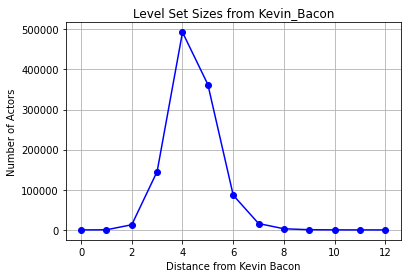

In [12]:
def bfs_level(graph, start_node):
    if start_node not in graph.vertices:
        return f"Error: {start_node} is not present in the graph."
    
    visited = set()  # To keep track of visited nodes
    level_sets = {}  # To store the number of nodes at each level
    queue = deque([(start_node, 0)])  # Queue will store (node, level)
    
    visited.add(start_node)
    
    while queue:
        current_node, level = queue.popleft()
        
        # If this level has already been visited, we increment the count
        if level not in level_sets:
            level_sets[level] = 0
        level_sets[level] += 1
        
        # Explore all neighbors of the current node
        for neighbor, movie in graph.adj_list.get(current_node, {}).items():
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, level + 1))
    
    return level_sets

# Example Usage: Running BFS from Kevin Bacon
start_actor = 'Kevin_Bacon'
level_sets = bfs_level(f_graph, start_actor)

# Plotting the level sets
if isinstance(level_sets, dict):  # Ensure the result is a valid level set dictionary
    distances = list(level_sets.keys())
    sizes = list(level_sets.values())

    # Plotting
    plt.plot(distances, sizes, marker='o', color='b', linestyle='-', markersize=6)
    plt.title(f"Level Set Sizes from {start_actor}")
    plt.xlabel('Distance from Kevin Bacon')
    plt.ylabel('Number of Actors')
    plt.grid(True)
    plt.show()
else:
    print(level_sets)

# Q5

In [13]:
# BFS traversal
def tbfs(u, q, seen, G, pred):
    q.append(u)  # Add starting node to the queue
    seen.add(u)  # Mark u as visited
    
    while q:
        node = q.popleft()
        for neighbor in G.adj_list[node]:
            if neighbor not in seen:
                seen.add(neighbor)
                q.append(neighbor)
                pred[neighbor] = node 

# Function to find the number of connected components
def find_connected_components(G):
    seen = set()  # visited nodes
    q = deque()   
    pred = {}     
    total_components = 0  # no. of connected components

    # Traverse graph
    for u in G.adj_list:
        if u not in seen:
            tbfs(u, q, seen, G, pred) 
            total_components += 1

    return total_components

# Output
total_components = find_connected_components(f_graph)
print("Total connected components:", total_components)


Total connected components: 59578


# Q6

In [14]:
t1=bfs(f_graph, 'Mirtha_Legrand', 'Amitabh_Bachchan')
t2=bi_directional_search(f_graph, 'Mirtha_Legrand', 'Amitabh_Bachchan')
t1=re.findall(r"\d+", t1.split()[-1])
print("The number of edges traveresed more in bfs compared to bi-bfs:",int(t1[0])-t2[1])

The number of edges traveresed more in bfs compared to bi-bfs: 333543


# Q7

In [15]:
def time_algorithm(algorithm, graph, start_node, target_node):
    start_time = timeit.default_timer()
    result = algorithm(graph, start_node, target_node)
    end_time = timeit.default_timer()
    return result, end_time - start_time


# Timing BFS
bfs_result, bfs_time = time_algorithm(bfs, f_graph, 'Brad_Pitt', 'Amitabh_Bachchan')
print(f"BFS Result: {bfs_result}")
print(f"BFS Time: {bfs_time:.6f} seconds")

# Timing Bi-Directional BFS
bds_result, bds_time = time_algorithm(bi_directional_search, f_graph, 'Brad_Pitt', 'Amitabh_Bachchan')
print(f"Bi-Directional BFS Result: {bds_result}")
print(f"Bi-Directional BFS Time: {bds_time:.6f} seconds")

BFS Result: Path: Brad_Pitt -(The_Audition)- Leonardo_DiCaprio -(Louder_Together)- Amitabh_Bachchan, Edges Traversed: 124074
BFS Time: 0.915636 seconds
Bi-Directional BFS Result: (['Amitabh_Bachchan', 'Leonardo_DiCaprio', 'Brad_Pitt'], 176)
Bi-Directional BFS Time: 0.000153 seconds


### It is very clear from the above illustration that bi-bfs is significantly faster than bfs.

## Bibliography

#### https://shawnlyu-official.medium.com/bfs-and-bi-directional-bfs-98cd4e6ad080
#### https://www.youtube.com/watch?v=POFCgzWwR-Y
#### https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/